In [ ]:
import os
import numpy as np
from PIL import Image


path = '/Users/wendy/Documents/2017 Fall/CS 534/project/data/img_align_celeba/'

def readpicture():
    inputt8 = []
    outputt32 = []
    
    n = 1
    
    image_paths = [os.path.join(path, f) for f in os.listdir(path)]
    for image_path in image_paths:
        if(image_path!='/Users/wendy/Documents/2017 Fall/CS 534/project/data/img_align_celeba/Thumbs.db'):
            print n, 
            image_pil = Image.open(image_path)
            outt32 = image_pil.resize((32,32))
            inn8 = outt32.resize((8,8))
        
        
            iii = np.array(inn8, 'uint8')
            inputt8.append(iii)
        
            ooo = np.array(outt32, 'uint8')
            outputt32.append(ooo)
            n = n+1
    
    inputt8 = np.array(inputt8)
    outputt32 = np.array(outputt32)
    np.save('/Users/wendy/Documents/2017 Fall/CS 534/project/npy_data/input8_8.npy',inputt8)
    np.save('/Users/wendy/Documents/2017 Fall/CS 534/project/npy_data/output32_32.npy',outputt32)

readpicture()

In [7]:
import os
import numpy as np
from PIL import Image
data_8=np.load("/Users/wendy/Documents/2017 Fall/CS 534/project/npy_data/input8_8.npy")
data_32=np.load("/Users/wendy/Documents/2017 Fall/CS 534/project/npy_data/output32_32.npy")

In [54]:
L=reshape(data_32[0],0,(32,32))
L=L/255-0.5
print L
from numpy import linalg as la  
U,sigma,VT=la.svd(L)
print VT
print sigma**2/31

#cov=np.dot(L,L.T)
#eig_val_8,eig_vec_8=np.linalg.eigvals(cov)
#eig_val_8

[[ 0.49215686  0.49215686  0.49215686 ..., -0.15490196  0.04901961
   0.48823529]
 [ 0.49215686  0.49215686  0.49215686 ..., -0.01372549  0.26862745
   0.47647059]
 [ 0.5         0.5         0.5        ...,  0.06470588  0.40980392
   0.48431373]
 ..., 
 [ 0.28431373  0.29607843  0.1        ...,  0.18235294  0.30392157
   0.39803922]
 [ 0.26862745 -0.0372549  -0.18235294 ..., -0.0372549   0.03333333
   0.2254902 ]
 [ 0.0254902  -0.00588235 -0.21764706 ..., -0.03333333 -0.03333333
  -0.06862745]]
[[-0.23267928 -0.22008072 -0.19401337 ..., -0.14470048 -0.19742261
  -0.2423226 ]
 [ 0.09054769  0.12483027  0.16500093 ..., -0.05130087 -0.01427913
   0.04187608]
 [-0.11853798 -0.08498641 -0.08121804 ..., -0.01331662 -0.06414895
  -0.14866741]
 ..., 
 [-0.08822706  0.2116171   0.21324172 ..., -0.47082907  0.07079948
  -0.08648316]
 [-0.00910403 -0.02759251  0.02238984 ...,  0.23372363 -0.38043137
  -0.00958558]
 [-0.02649769  0.09334254 -0.41793828 ..., -0.16525738  0.05589565
   0.25287718]]


In [59]:
def reshape(data,index,shape,n):
    data_reshape=[]
    for i in range(len(data)):
        for j in range(len(data[index])):
            
                s=data[i][j][index]
                data_reshape.append(float(s))
    
    sample=np.reshape(data_reshape,shape) 
    return sample

In [61]:



from numpy import linalg as la
def get_eig(data,shape,n):
    eig_val=[]
    eig_vec=[]
    for i in range(len(data_8[0][0][0])):
        L=reshape(data,i,shape,n)
        L=L/255-0.5
        
        U,sigma,VT=la.svd(L)
        eig_val_8=sigma**2/(n-1)
        eig_vec_8=VT
        bibibi=U
        eig_val.append(eig_val_8)
        eig_vec.append(eig_vec_8)
    return eig_val,eig_vec,bibibi
        
ori_val=[]
ori_vec=[]
reshaped_val=[]
reshaped_vec=[]
for i in range(len(data_8)):
    eig_val_8,eig_vec_8=get_eig(data_8[i],(8,8),8)
    #print eig_val_8
    eig_val_32,eig_vec_32=get_eig(data_32[i],(32,32),32)
    reshaped_val.append(eig_val_8)
    reshaped_vec.append(eig_vec_8)
    ori_val.append(eig_val_32)
    ori_vec.append(eig_vec_32)


In [150]:
np.save('/Users/wendy/Documents/2017 Fall/CS 534/project/npy_data/reshaped_val.npy',reshaped_val)
np.save('/Users/wendy/Documents/2017 Fall/CS 534/project/npy_data/reshaped_vec.npy',reshaped_vec)
np.save('/Users/wendy/Documents/2017 Fall/CS 534/project/npy_data/ori_vec.npy',ori_vec)
np.save('/Users/wendy/Documents/2017 Fall/CS 534/project/npy_data/ori_val.npy',ori_val)

In [191]:
trainx=reshaped_val[0:int(0.6*len(reshaped_val))]
testx=reshaped_val[int(0.6*len(reshaped_val)):len(reshaped_val)]
trainy=ori_val[0:int(0.6*len(reshaped_val))]
testy=ori_val[int(0.6*len(reshaped_val)):len(reshaped_val)]


In [192]:
##from sklearn.model_selection import train_test_split
##trainx,testx,trainy,testy=train_test_split(reshaped_val,ori_val,test_size=0.4, random_state=0)
trainx=np.array(trainx)
trainy=np.array(trainy)
trainy=np.real(trainy)
testx=np.array(testx)
testy=np.array(testy)
testy=np.real(testy)
np.save('/Users/wendy/Documents/2017 Fall/CS 534/project/npy_data/trainx.npy',trainx)
np.save('/Users/wendy/Documents/2017 Fall/CS 534/project/npy_data/testx.npy',testx)
np.save('/Users/wendy/Documents/2017 Fall/CS 534/project/npy_data/trainy.npy',trainy)
np.save('/Users/wendy/Documents/2017 Fall/CS 534/project/npy_data/testy.npy',testy)

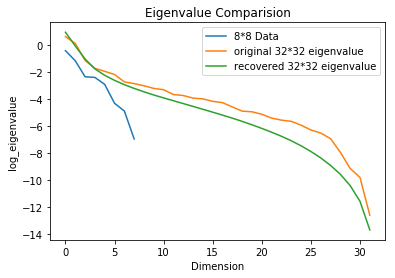

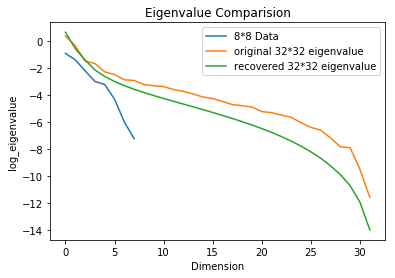

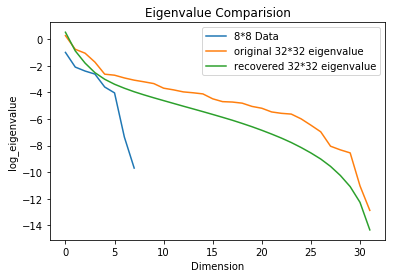

In [189]:
#print train_val_1,trainy[0]


for i in range(len(trainx[0])):
    for j in range(len(trainx[0][0])):
        trainx[0][i][j] = math.log(trainx[0][i][j])   
        
for i in range(len(trainy[0])):
    for j in range(len(trainy[0][0])):
        trainy[0][i][j] = math.log(trainy[0][i][j]) 

L1=[]
a=np.array(train_val_1[0])
for i in range(len(a[0])):
    L1.append(math.log(a[0][i]))
    
L2=[]
a=np.array(train_val_2[0])
for i in range(len(a[0])):
    L2.append(math.log(a[0][i]))
    
L3=[]
a=np.array(train_val_3[0])
for i in range(len(a[0])):
    L3.append(math.log(a[0][i]))
    
    
import matplotlib.pyplot as plt
%matplotlib inline


plt.title('Eigenvalue Comparision')
plt.xlabel('Dimension')
plt.ylabel('log_eigenvalue')
plt.plot(range(0,8), trainx[0][0],label='8*8 Data')
plt.plot(range(0,32),trainy[0][0],label='original 32*32 eigenvalue')
plt.plot(range(0,32),L1,label='recovered 32*32 eigenvalue')
plt.legend()
plt.show()
###
plt.title('Eigenvalue Comparision')
plt.xlabel('Dimension')
plt.ylabel('log_eigenvalue')
plt.plot(range(0,8), trainx[0][1],label='8*8 Data')
plt.plot(range(0,32),trainy[0][1],label='original 32*32 eigenvalue')
plt.plot(range(0,32),L2,label='recovered 32*32 eigenvalue')
plt.legend()
plt.show()
##
plt.title('Eigenvalue Comparision')
plt.xlabel('Dimension')
plt.ylabel('log_eigenvalue')
plt.plot(range(0,8), trainx[0][2],label='8*8 Data')
plt.plot(range(0,32),trainy[0][2],label='original 32*32 eigenvalue')
plt.plot(range(0,32),L3,label='recovered 32*32 eigenvalue')
plt.legend()
plt.show()

In [107]:

import random
import csv
import numpy
import scipy
from math import sqrt
from numpy import *
w=np.zeros((8, 32))
def SGD(w,lr,lam,x,y):
    index=0
    while index < 1000000:
        i=random.randint(0,len(y))
        xsample=mat(x[i-1])
        #print shape(xsample)
        ysample=mat(y[i-1])
        gradient_w=xsample*w-ysample
        
        if gradient>=0:
            w=w-lr*gradient_w
        else:
            w=w+lr*gradient_w
        index = index + 1
        #print w
    return w
#SGD(w,0.0001,1000,trainx[:,0],trainy[:,0])

best_c is: 10 best_lr is: 0.001 with the err: 0.00958451352801


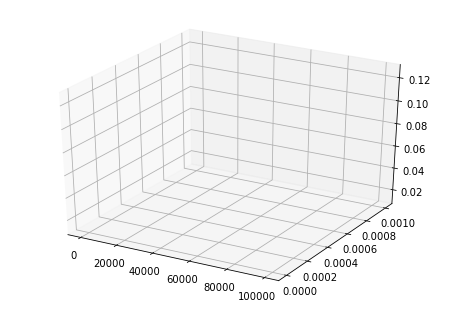

best_c is: 100 best_lr is: 0.001 with the err: 0.0105166407164


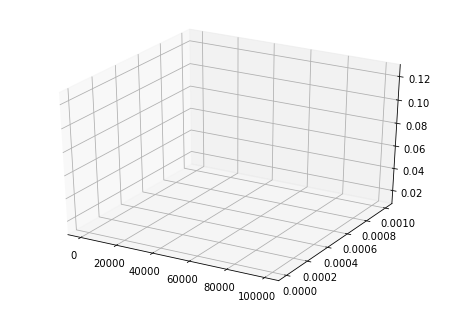

best_c is: 1000 best_lr is: 0.001 with the err: 0.0140108176538


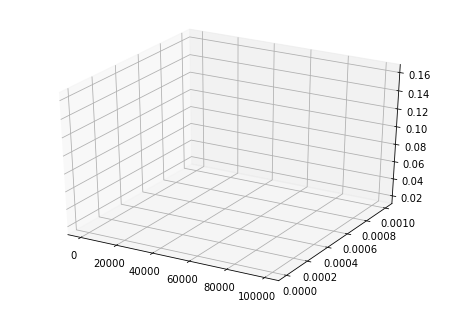

In [66]:
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix, mean_squared_error
def cv(lr,c,index):
    L=[]
    kf = KFold(n_splits=5,shuffle=True, random_state=0)
    for train_index, test_index in kf.split(trainx):
        coef=SGD(w,lr,c,trainx[:,index][train_index],trainy[:,index][train_index])
        #print coef
        prediction=trainx[:,index][test_index]*coef
        actuals = trainy[:,index][test_index]
        #print prediction, actuals
        #print mean_squared_error(actuals, prediction)
        L.append(mean_squared_error(actuals, prediction))
    return sum(L)/5

def feature_selection(index):
    lr=[0.001,0.0001,0.000001,0.0000001]
    C=[10,100,1000,10000,100000]
    err_list=[]
    err_small=float("Inf")
    lr_list=[]
    C_list=[]
    for i in lr:
        for j in C:
            #print i,j
            err=cv(i,j,index)
            #print err
            err_list.append(err)
            lr_list.append(i)
            C_list.append(j)
            if err<err_small:
                best_lr=i
                best_c=j
                err_small=err
                
            #print err,err_small,i,j
    print "best_c is:",best_c,"best_lr is:",best_lr,"with the err:",err_small

    from matplotlib import pyplot as plt
    from mpl_toolkits.mplot3d import Axes3D
    fig=plt.figure()
    ax=Axes3D(fig)
    #ax.set_xscale("log")
    #ax.set_yscale("log")
    ax.plot_surface(C_list,lr_list,err_list,rstride=1, cstride=1, cmap='rainbow')
    plt.show()
    
    return best_c,best_lr,err_small,C_list,lr_list,err_list
c_1,lr_1,Err_1,C_list1,lr_list1,err_list1=feature_selection(0)
c_2,lr_2,Err_2,C_list2,lr_list2,err_list2=feature_selection(1)
c_3,lr_3,Err_3,C_list3,lr_list3,err_list3=feature_selection(2)

In [145]:
np.save('/Users/wendy/Documents/2017 Fall/CS 534/project/npy_data/err_list1.npy',err_list1)
np.save('/Users/wendy/Documents/2017 Fall/CS 534/project/npy_data/C_list1.npy',C_list1)
np.save('/Users/wendy/Documents/2017 Fall/CS 534/project/npy_data/lr_list1',lr_list1)

In [67]:
coeff_1=SGD(w,0.001,10,trainx[:,0],trainy[:,0])
coeff_2=SGD(w,0.001,100,trainx[:,1],trainy[:,1])
coeff_3=SGD(w,0.001,1000,trainx[:,2],trainy[:,2])

In [166]:
pre_val_1=testx[:,0]*coeff_1
pre_val_2=testx[:,1]*coeff_2
pre_val_3=testx[:,2]*coeff_3


In [167]:
np.save('/Users/wendy/Documents/2017 Fall/CS 534/project/npy_data/err_list1.npy',err_list1)
np.save('/Users/wendy/Documents/2017 Fall/CS 534/project/npy_data/err_list2.npy',err_list2)
np.save('/Users/wendy/Documents/2017 Fall/CS 534/project/npy_data/err_list3.npy',err_list3)

In [168]:
train_val_1=trainx[:,0]*coeff_1
train_val_2=trainx[:,1]*coeff_2
train_val_3=trainx[:,2]*coeff_3
from scipy import io

np.save('/Users/wendy/Documents/2017 Fall/CS 534/project/npy_data/train_val_1.npy',train_val_1)
np.save('/Users/wendy/Documents/2017 Fall/CS 534/project/npy_data/train_val_2.npy',train_val_2)
np.save('/Users/wendy/Documents/2017 Fall/CS 534/project/npy_data/train_val_3.npy',train_val_3)

In [169]:
len(train_val_1)

121559

In [60]:
data32=np.load('/Users/wendy/Documents/2017 Fall/CS 534/project/npy_data/pre_val_3.npy')
print data32[0]

[  4.16547113e+03  -2.44360207e+01  -8.22318779e-01  -6.59712542e+00
  -6.70802714e+00  -1.75225438e+00   2.53174688e+00  -1.01827572e+01
  -3.23469221e+00  -6.21779725e+00  -1.91497578e+00   7.07455814e-01
  -1.31835302e+00  -6.24099692e-01   3.67156178e+00   4.04807437e-02
   1.18154543e+00   5.26422391e-01   4.00477849e-01   1.30000001e+00
   6.29387880e-01  -2.07715486e-01   1.23921746e+00  -3.35845167e-01
   1.29914904e+00  -8.70321198e-02   1.85116766e+00   7.81975368e-01
   1.56772396e+00   8.00835310e-01   5.83977621e-01   3.32031012e-01]


In [159]:
np.save('/Users/wendy/Documents/2017 Fall/CS 534/project/npy_data/pre_val_1.npy',pre_val_1)
np.save('/Users/wendy/Documents/2017 Fall/CS 534/project/npy_data/pre_val_2.npy',pre_val_2)
np.save('/Users/wendy/Documents/2017 Fall/CS 534/project/npy_data/pre_val_3.npy',pre_val_3)

In [ ]:
import xgboost as xgb
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix, mean_squared_error
kf = KFold(n_splits=2, shuffle=True, random_state=0)
for train_index, test_index in kf.split(trainx):
    xgb_model = xgb.XGBRegressor().fit(trainx[train_index], trainy[train_index])
    predictions = xgb_model.predict(trainx[test_index])
    actuals = trainy[test_index]
    print(mean_squared_error(actuals, predictions))

In [70]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix, mean_squared_error
kf = KFold(n_splits=5, shuffle=True, random_state=0)
def tree_selection(d,l,index):
    L=[]
    for train_index, test_index in kf.split(trainx[:,index]):
        tree = DecisionTreeRegressor(max_depth=d,max_leaf_nodes=l)
        tree.fit(trainx[:,index][train_index],trainy[:,index][train_index])
        predictions =tree.predict(trainx[:,index][test_index])
        actuals = trainy[:,index][test_index]
        L.append(mean_squared_error(actuals, predictions))
    return sum(L)/5

best_depth is: 11 best_num_leaf is: 19 with the err: 0.00353459503346


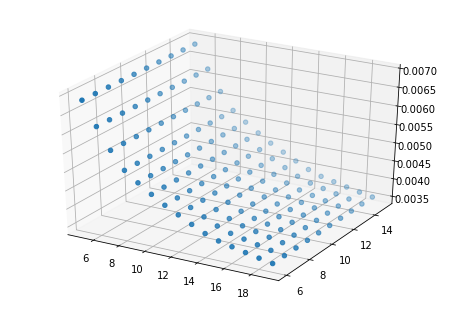

best_depth is: 10 best_num_leaf is: 19 with the err: 0.00297814428837


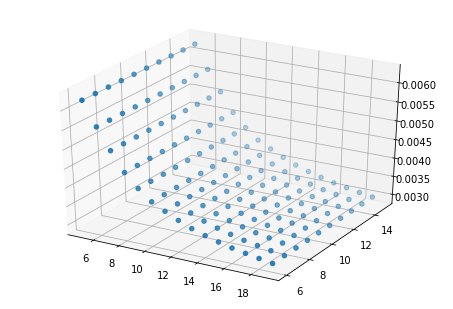

best_depth is: 9 best_num_leaf is: 19 with the err: 0.0032503121873


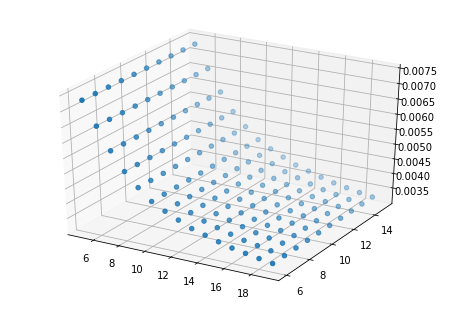

In [72]:
def tree(index):
    leaf=[5,10,15,20]
    err_list=[]
    err_small=float("Inf")
    depth_list=[]
    leaf_num_list=[]
    for i in range(5,15):
        for j in range(5,20):
            err=tree_selection(i+1,j,index)
            err_list.append(err)
            depth_list.append(i+1)
            leaf_num_list.append(j)
            if err<err_small:
                best_depth=i
                best_num_leaf=j
                err_small=err
            #print "best_depth is:",best_depth,"best_num_leaf is:",best_num_leaf
    print "best_depth is:",best_depth,"best_num_leaf is:",best_num_leaf,"with the err:",err_small
    from matplotlib import pyplot as plt
    from mpl_toolkits.mplot3d import Axes3D
    fig=plt.figure()
    ax=Axes3D(fig)
    ax.scatter(leaf_num_list,depth_list,err_list)
    plt.show()
    
    return best_num_leaf,best_depth,err_small,err_list,depth_list,leaf_num_list


L_1,D_1,Err_1,err_list_1,depth_list_1,leaf_num_list_1=tree(0)
L_2,D_2,Err_1,err_list_2,depth_list_2,leaf_num_list_2=tree(1)
L_3,D_3,Err_1,err_list_3,depth_list_3,leaf_num_list_3=tree(2)

In [194]:
tree = DecisionTreeRegressor(max_depth=11,max_leaf_nodes=19)
tree.fit(trainx[:,0],trainy[:,0])
prediction_test=tree.predict(testx[:,0])
prediction_train_1=tree.predict(trainx[:,0])

tree = DecisionTreeRegressor(max_depth=10,max_leaf_nodes=19)
tree.fit(trainx[:,1],trainy[:,1])
prediction_test=tree.predict(testx[:,1])
prediction_train_2=tree.predict(trainx[:,1])

tree = DecisionTreeRegressor(max_depth=9,max_leaf_nodes=19)
tree.fit(trainx[:,2],trainy[:,2])
prediction_test=tree.predict(testx[:,2])
prediction_train_3=tree.predict(trainx[:,2])

In [195]:
np.save('/Users/wendy/Documents/2017 Fall/CS 534/project/npy_data/prediction_train_1.npy',prediction_train_1)
np.save('/Users/wendy/Documents/2017 Fall/CS 534/project/npy_data/prediction_train_2.npy',prediction_train_2)
np.save('/Users/wendy/Documents/2017 Fall/CS 534/project/npy_data/prediction_train_3.npy',prediction_train_3)

In [ ]:
print prediction_train[0]
print trainx[0]
print trainy[0]

for i in range(len(trainx[0])):
    for j in range(len(trainx[0][0])):
        trainx[0][i][j] = math.log(trainx[0][i][j])   
        
for i in range(len(trainy[0])):
    for j in range(len(trainy[0][0])):
        trainy[0][i][j] = math.log(trainy[0][i][j]) 

L1=[]
print a
a=np.array(prediction_train_1[0])
for i in range(len(a)):
    L1.append(math.log(a[i]))
    
L2=[]
a=np.array(prediction_train_2[0])
for i in range(len(a)):
    L2.append(math.log(a[i]))
    
L3=[]
a=np.array(prediction_train_3[0])
for i in range(len(a)):
    L3.append(math.log(a[i]))
    
    
import matplotlib.pyplot as plt
%matplotlib inline


plt.title('Eigenvalue Comparision')
plt.xlabel('Dimension')
plt.ylabel('log_eigenvalue')
plt.plot(range(0,8), trainx[0][0],label='8*8 Data')
plt.plot(range(0,32),trainy[0][0],label='original 32*32 eigenvalue')
plt.plot(range(0,32),L1,label='recovered 32*32 eigenvalue')
plt.legend()
plt.show()
###
plt.title('Eigenvalue Comparision')
plt.xlabel('Dimension')
plt.ylabel('log_eigenvalue')
plt.plot(range(0,8), trainx[0][1],label='8*8 Data')
plt.plot(range(0,32),trainy[0][1],label='original 32*32 eigenvalue')
plt.plot(range(0,32),L2,label='recovered 32*32 eigenvalue')
plt.legend()
plt.show()
##
plt.title('Eigenvalue Comparision')
plt.xlabel('Dimension')
plt.ylabel('log_eigenvalue')
plt.plot(range(0,8), trainx[0][2],label='8*8 Data')
plt.plot(range(0,32),trainy[0][2],label='original 32*32 eigenvalue')
plt.plot(range(0,32),L3,label='recovered 32*32 eigenvalue')
plt.legend()
plt.show()

In [ ]:
from sklearn import linear_model
def logistic_selection(b,index):
    L=[]
    for train_index, test_index in kf.split(trainx[:,index]):
        model = linear_model.LogisticRegression(penalty='l2', C=b)
        print np.shape(trainx[:,index][train_index]),np.shape(trainy[:,index][train_index])
        model.fit(trainx[:,index][train_index],trainy[:,index][train_index])
        predictions =model.predict(trainx[:,index][test_index])
        actuals = trainy[:,index][test_index]
    
        L.append(mean_squared_error(actuals, predictions))

    return sum(L)/5

In [ ]:
err_list=[]
err_small=float("Inf")
c=[]
best_tol=0
best_c=0
c_list=logspace(0,5,6)

for j in c_list:
    err=logistic_selection(j,0)
    print err,j
    err_list.append(err)
    c.append(j)
    
    if err<err_small:
        best_c=j
        err_small=err

print "best_num_leaf is:",best_c


In [147]:
c_list=logspace(0,5,6)

In [293]:
trainx[0]

array([[  9.95092737e+02,   3.59869480e+02,  -2.75334428e+02,
         -2.00940732e+02,  -1.31140495e+02,   1.72635307e+02,
          8.48662388e+01,  -2.20481075e+01],
       [  9.41166876e+02,   3.58508234e+02,  -2.79440693e+02,
          2.13621884e+02,   1.79828116e+02,  -1.44364942e+02,
          8.26758543e-01,  -5.91462333e+01],
       [  1.00675822e+03,   3.45076250e+02,   2.23711695e+02,
          1.94679290e+02,   2.94524541e+01,  -1.52223806e+02,
         -2.17581614e+02,  -1.95872486e+02]])

In [12]:
model = linear_model.LogisticRegression(penalty='l2', C=b)
model.fit(trainx[:,index][train_index],trainy[:,index][train_index])

NameError: name 'linear_model' is not defined

SyntaxError: invalid syntax (<ipython-input-1-a6279b5a9d32>, line 1)